<a href="https://colab.research.google.com/github/Gennadiy-Korobeynikov/LoanApprovalPrediction_ClassicML/blob/main/LoanApprovalPrediction_ClassicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/media/loan_sanction_train.csv")
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    614 non-null    object 
 1   Gender                     601 non-null    object 
 2   Married                    611 non-null    object 
 3   Dependents                 599 non-null    object 
 4   Education                  614 non-null    object 
 5   Self_Employed              582 non-null    object 
 6   ApplicantIncome            614 non-null    int64  
 7   CoapplicantIncome          614 non-null    float64
 8   LoanAmount                 592 non-null    float64
 9   Loan_Amount_Term           600 non-null    float64
 10  Credit_History             564 non-null    float64
 11  Property_Area              614 non-null    object 
 12  Loan_Status                614 non-null    object 
 13  Is_Credit_History_Missing  614 non-null    int8   

In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
df = pd.get_dummies(df, columns=['Property_Area'])

df['Is_Credit_History_Missing'] = df['Credit_History'].isnull().astype('int8')

df.Credit_History = df['Credit_History'].map({1:2,0:0})
df.Credit_History = df['Credit_History'].fillna(1)
df.head()

<ipython-input-15-0b889aed1137>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Is_Credit_History_Missing
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,2.0,Y,False,False,True,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,2.0,N,True,False,False,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,2.0,Y,False,False,True,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,2.0,Y,False,False,True,0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,2.0,Y,False,False,True,0


In [ ]:
df.Credit_History.value_counts()

,count
Credit_History,
1.0,614


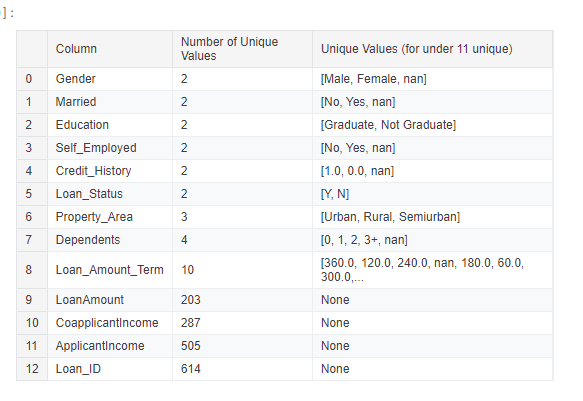

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# VIZUALIZATION

<Axes: xlabel='Loan_Status', ylabel='count'>

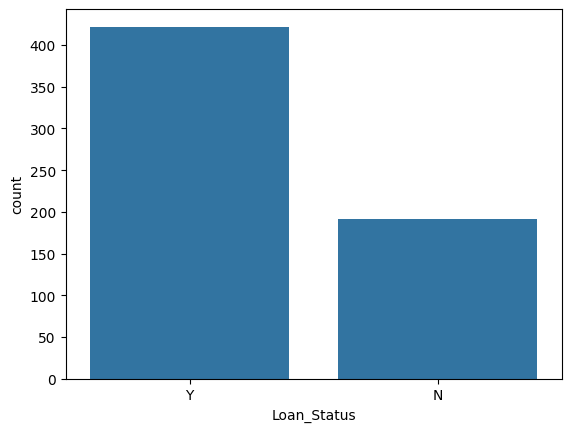

In [ ]:
sns.countplot(x='Loan_Status', data=df)

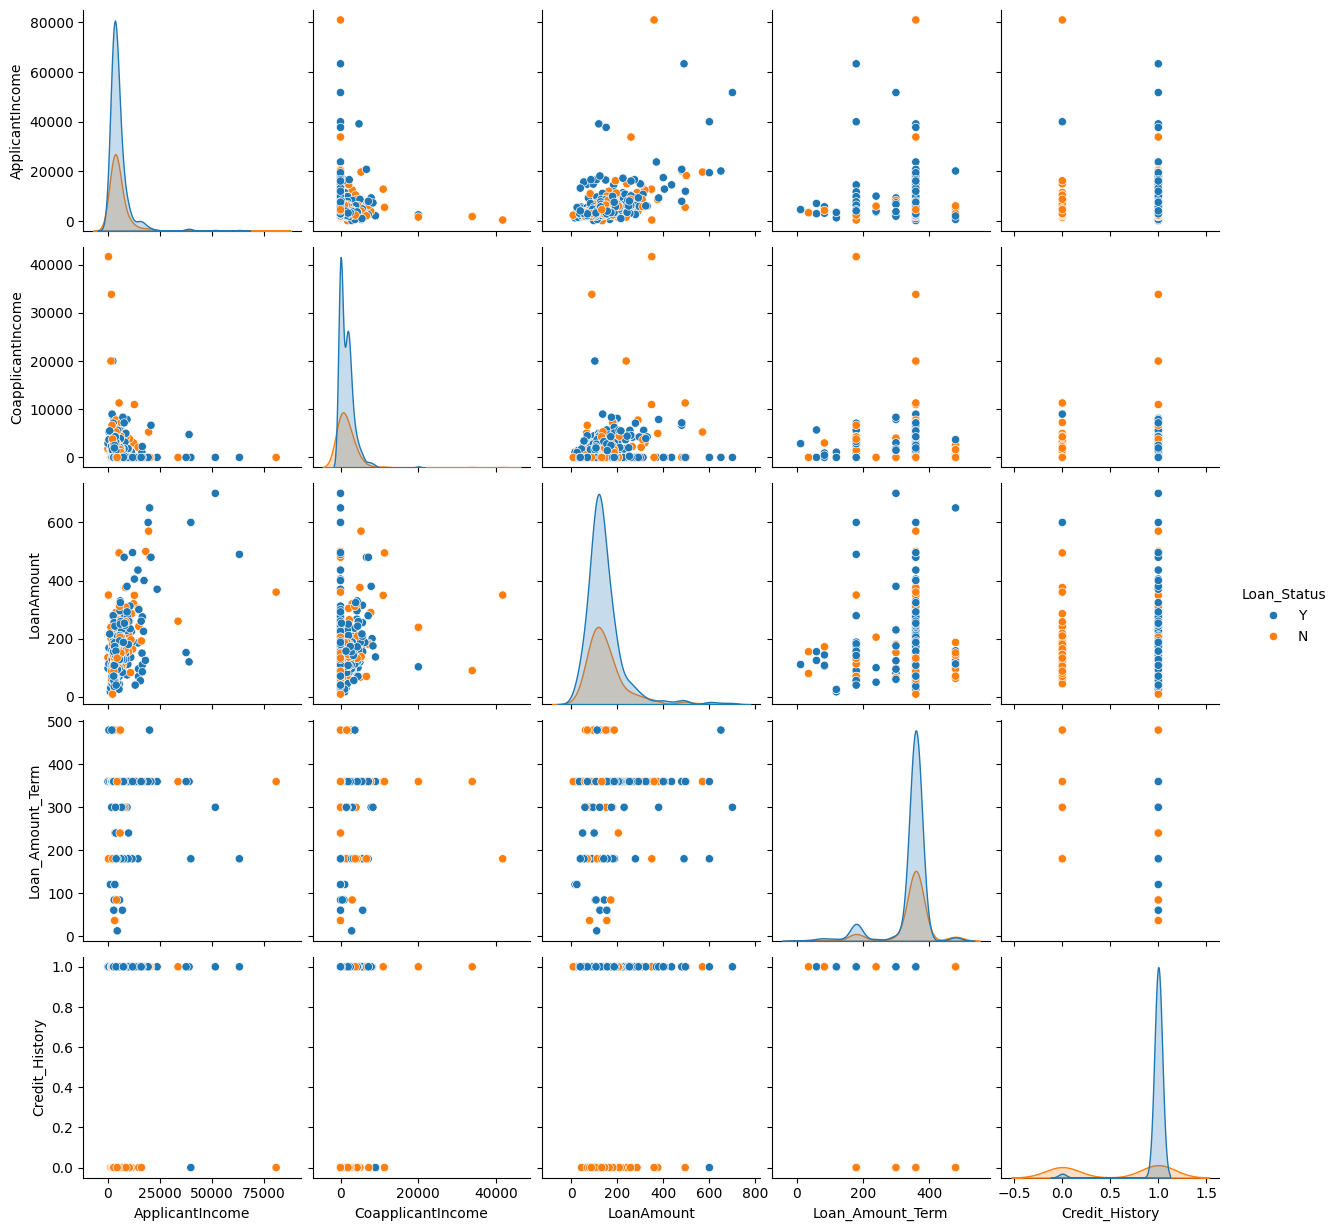

In [ ]:
sns.pairplot(df,hue = 'Loan_Status')
plt.show()
#1,5 & 3,5! Также с помощью парных диаграмм (pair plot) можно видеть графики зависимости

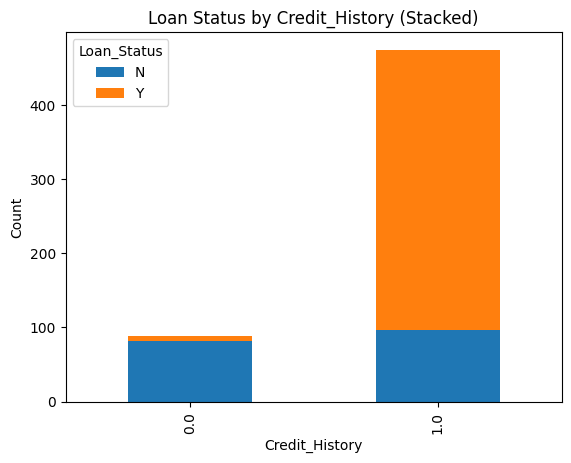

In [ ]:
loan_status_counts = df.groupby(['Credit_History', 'Loan_Status'])['Loan_Status'].count().unstack()
loan_status_counts.plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit_History (Stacked)')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Married', ylabel='count'>

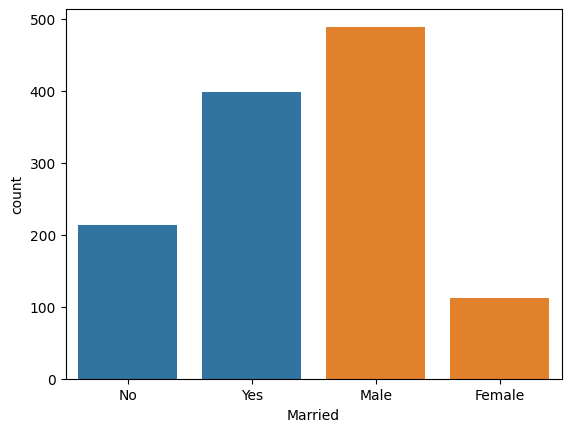

In [ ]:
sns.countplot(x='Married', data=df)
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

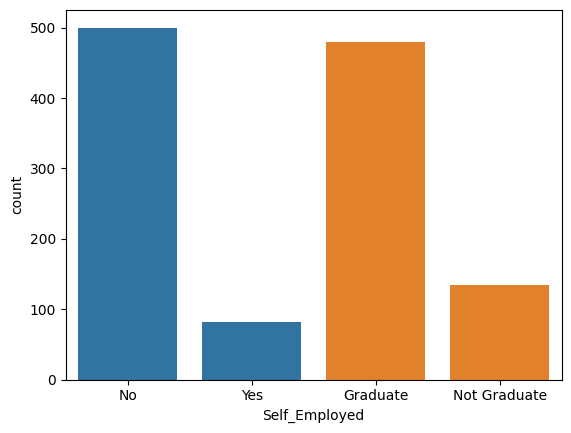

In [ ]:
sns.countplot(x='Self_Employed', data=df)
sns.countplot(x='Education', data=df)

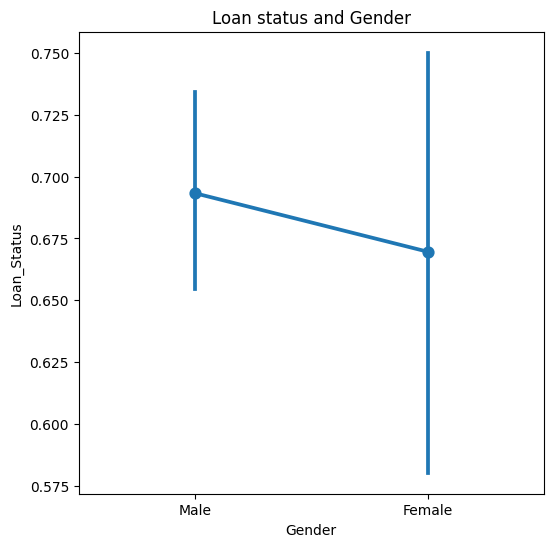

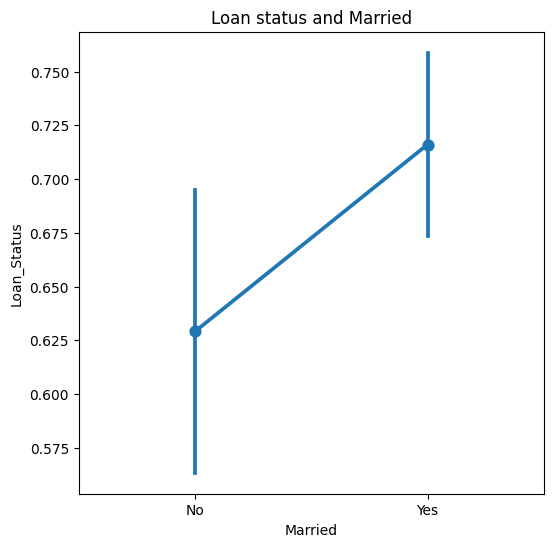

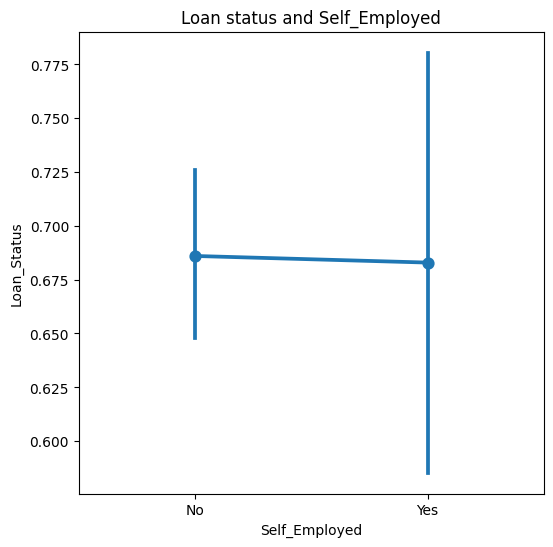

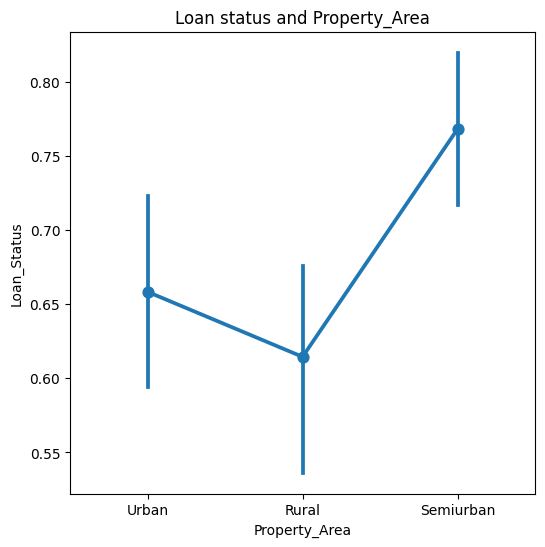

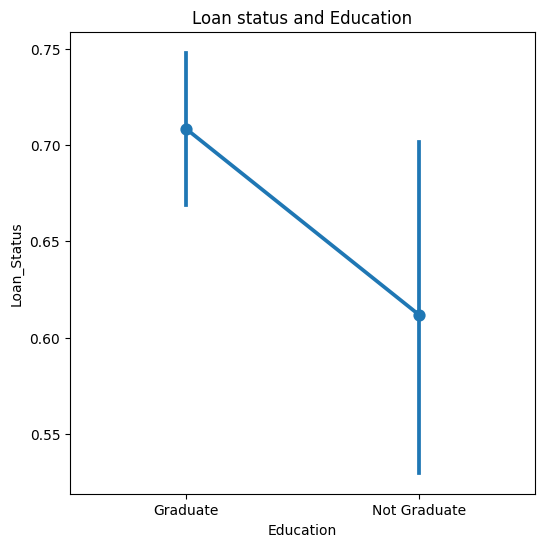

In [ ]:
df_with_int_loan_status = df.copy()
df_with_int_loan_status['Loan_Status'] = df_with_int_loan_status['Loan_Status'].map({'Y':1,'N':0}).astype('int')

cat_col = ['Gender', 'Married', 'Self_Employed','Property_Area', 'Education' ]

# plot target vs categorical columns:
for i, col in enumerate(cat_col):
    plt.figure(i, figsize=(6,6))
    sns.pointplot(x=col, y='Loan_Status', data=df_with_int_loan_status)
    plt.title(f"Loan status and {col}")
    plt.show()


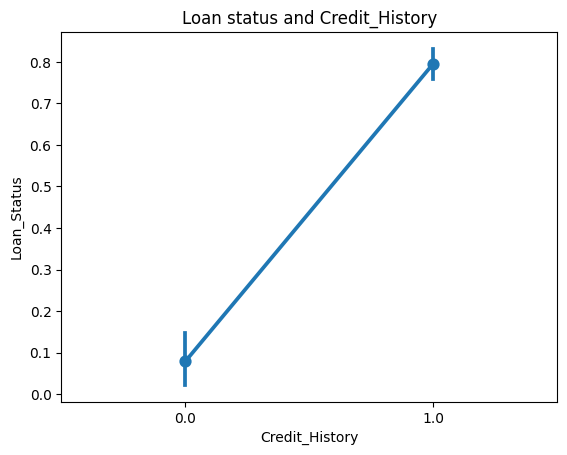

In [ ]:
sns.pointplot(x="Credit_History", y='Loan_Status', data=df_with_int_loan_status)
plt.title("Loan status and Credit_History")
plt.show()

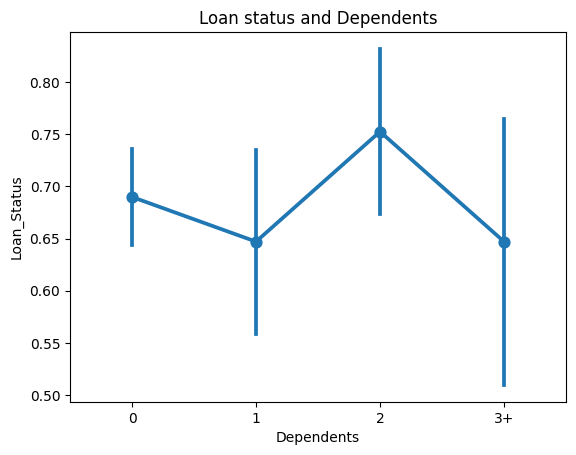

In [ ]:
sns.pointplot(x="Dependents", y='Loan_Status', data=df_with_int_loan_status)
plt.title("Loan status and Dependents")
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

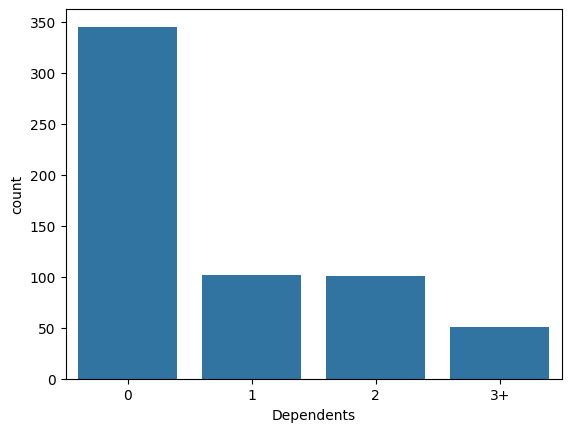

In [ ]:
sns.countplot(x='Dependents', data=df)

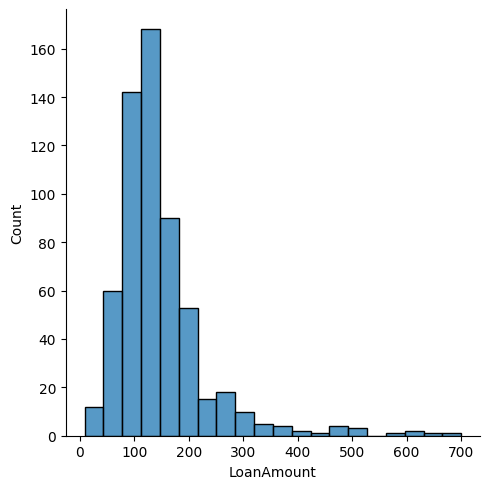

In [ ]:
sns.displot(df, x="LoanAmount", bins=20, kind='hist')

In [ ]:
loan_mean = df.LoanAmount.mean()
print(loan_mean)

146.41216216216216


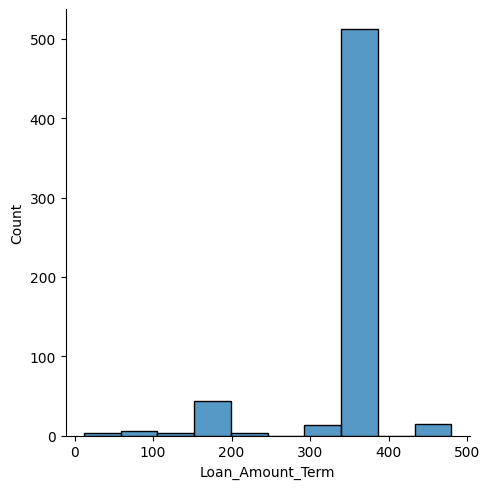

In [ ]:
sns.displot(df, x="Loan_Amount_Term", bins=10, kind='hist')

In [ ]:
cnts = df.Loan_Amount_Term.value_counts()
cnts

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


Text(0.5, 1.0, 'Salary by company size')

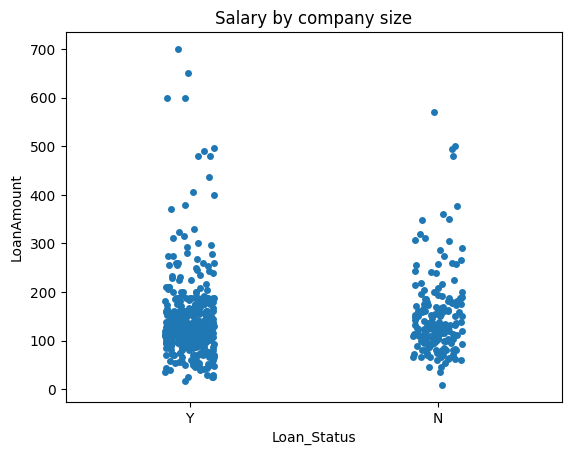

In [ ]:
sns.stripplot(x=df['Loan_Status'], y=df['LoanAmount'], data=df).set_title('Salary by company size')

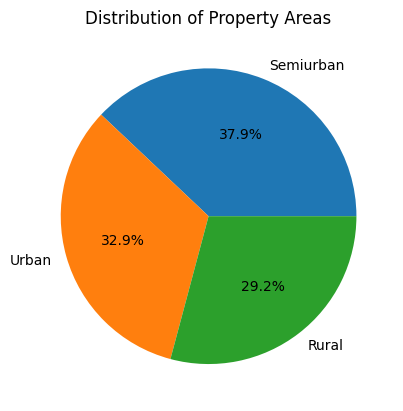

In [ ]:
prop_area = np.array(df['Property_Area'].value_counts(sort=True))
labels = property_area_counts.index

plt.title('Distribution of Property Areas')

plt.pie(prop_area,labels=labels,autopct='%1.1f%%')
plt.show()

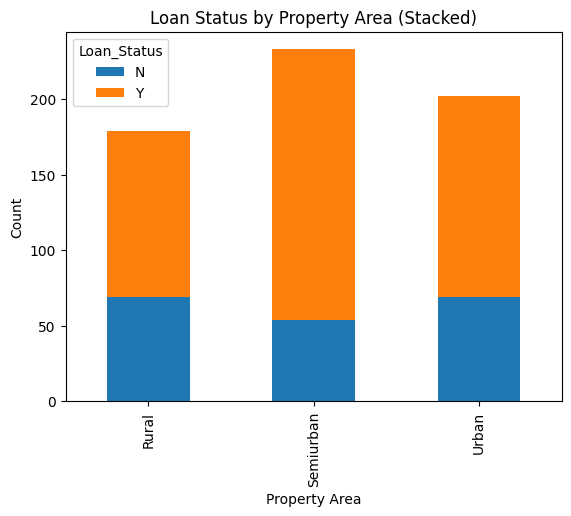

In [ ]:
loan_status_counts = df.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count().unstack()
loan_status_counts.plot(kind='bar', stacked=True)
plt.title('Loan Status by Property Area (Stacked)')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

# Proccessing

In [ ]:
df.Loan_Status = df['Loan_Status'].map({"Y":1,"N":0})

df.Self_Employed = df['Self_Employed'].map({"Yes":1,"No":0})

df.Married = df['Married'].map({"Yes":1,"No":0})

df.Gender = df['Gender'].map({"Male":1,"Female":0})
df.rename(columns={'Gender': 'IsMale'}, inplace=True)

df.Education = df['Education'].map({"Graduate":1,"Not Graduate":0})
df.rename(columns={'Education': 'Graduated'}, inplace=True)

df.head()


,Loan_ID,IsMale,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Is_Credit_History_Missing
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,2.0,1,False,False,True,0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,2.0,0,True,False,False,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,2.0,1,False,False,True,0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,2.0,1,False,False,True,0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,2.0,1,False,False,True,0


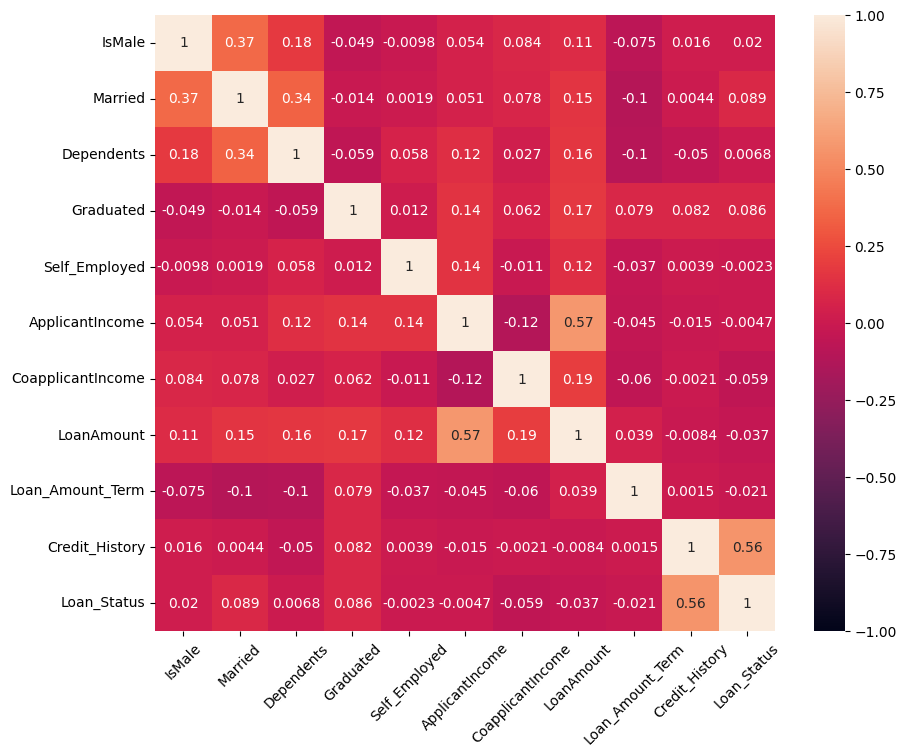

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45);

In [ ]:
loan_mean = df.LoanAmount.mean()

In [ ]:
#Нельзя заменять credit_history
df = df.fillna({'IsMale':True})
df = df.fillna({'Self_Employed':False})
df = df.fillna({'LoanAmount':loan_mean})
df = df.fillna({'Loan_Amount_Term':360})
df = df.fillna({'Dependents':0})
df = df.dropna(subset=['Married']) #Немного и разница в значимости

df.isna().sum()

,0
Loan_ID,0
IsMale,0
Married,0
Dependents,0
Graduated,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df['Loan_Status'] = df['Loan_Status'].astype('int8')
df.drop("Loan_ID",axis=1,inplace=True)

In [ ]:
df.dtypes

,0
IsMale,object
Married,float64
Dependents,float64
Graduated,int64
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [ ]:
df.head()

,IsMale,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Is_Credit_History_Missing
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,2.0,1,False,False,True,0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,2.0,0,True,False,False,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,2.0,1,False,False,True,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,2.0,1,False,False,True,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,2.0,1,False,False,True,0


In [ ]:
x = df.drop("Loan_Status",axis=1)
y = df.Loan_Status

x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
df.shape

(458, 14)
(153, 14)


(611, 15)

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': range(1,30,5),
  'min_samples_split': [2, 5, 10, 20],
  'min_samples_leaf': range(1,10)
}
clf = DecisionTreeClassifier()
cv = GridSearchCV(clf,param_grid,n_jobs=-1)
cv.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30, 5),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': [2, 5, 10, 20]})

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
best_tree = cv.best_estimator_
pred = best_tree.predict(x_test)
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))
precision_score(y_test,pred,average='micro')


0.803921568627451
0.8790322580645161


0.803921568627451

<Axes: >

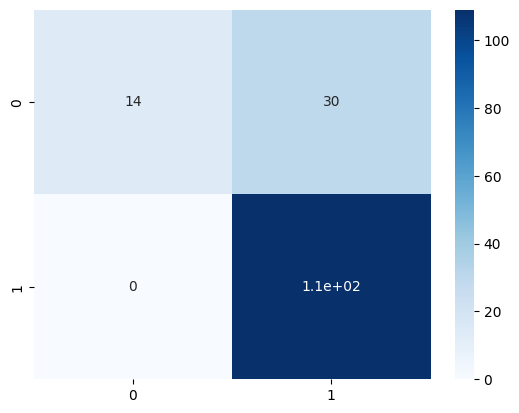

In [ ]:
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")

# RANDOM FOREST

In [ ]:
params = {
    "n_estimators":range(10,51,10),
    "max_depth":range(1,13,2),
    "min_samples_leaf":range(1,8),
    "min_samples_split": range(2,10,2)
}

rf = RandomForestClassifier(random_state=0)
cv = GridSearchCV(rf,params,cv=3, n_jobs=-1)
cv.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
cv.best_params_


{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
params = {
    'max_depth': [5],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    "n_estimators":range(50,351,50),
}
rf = RandomForestClassifier(random_state=0)
cv = GridSearchCV(rf,params, n_jobs=-1)
#n_jobs=-1 — использовать все доступные ядра процессора.
cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [5],
                         'min_samples_split': [2],
                         'n_estimators': range(50, 351, 50)})

In [ ]:
params = {
    'max_depth': [5],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    "n_estimators":range(30,51,2),
}
rf = RandomForestClassifier(random_state=0)
cv = GridSearchCV(rf,params, n_jobs=-1)
#n_jobs=-1 — использовать все доступные ядра процессора.
cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [5],
                         'min_samples_split': [2],
                         'n_estimators': range(30, 51, 2)})

In [ ]:
cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

<Axes: >

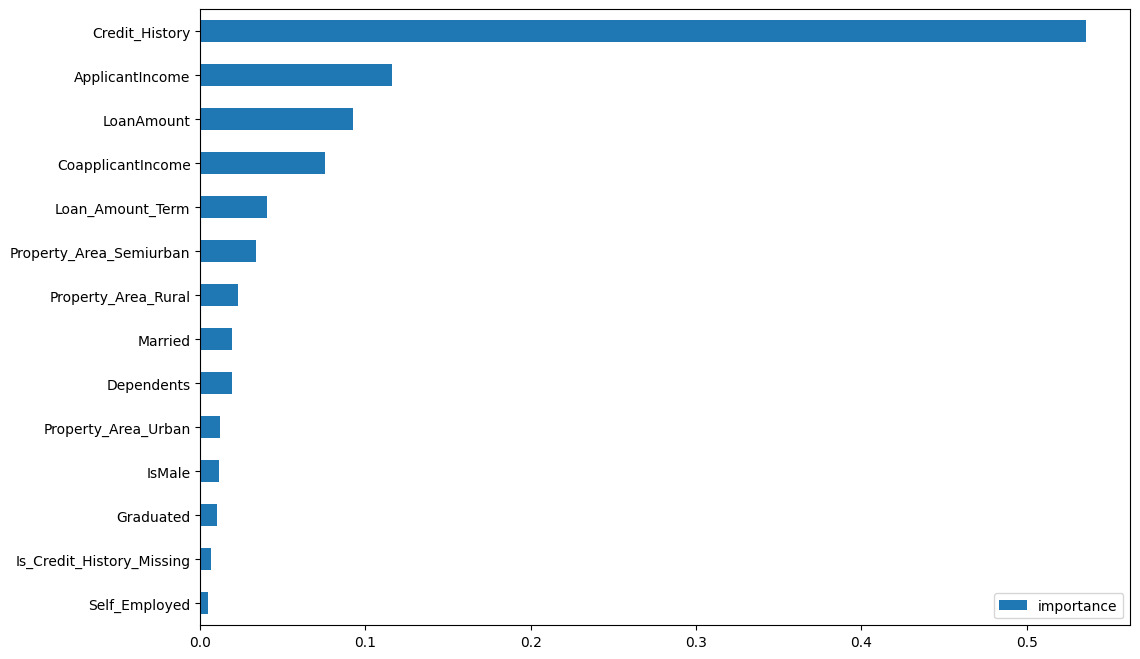

In [ ]:
rf = cv.best_estimator_
imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
pred = rf.predict(x_test)
pred.sum()

137

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))

0.803921568627451
0.8780487804878049


<Axes: >

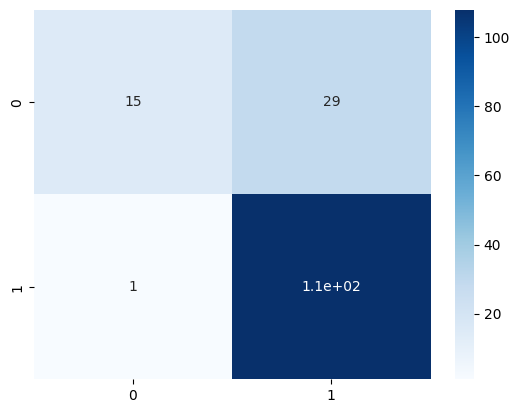

In [ ]:
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")